In [1]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016


ticker='ANO.AX'
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)

data=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   

#y=data.resample('MS').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=selectParameters(ticker,y,steps=2,disp=True)
#['8CO.AX', 0, 0, 0, 0, 0, 0, 12, 't', -7.909122119923726, 0.03528654153968552]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]
#data=data['2019-04-01':]

In [2]:
y=data.resample('W').mean()
steps=1
#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=steps,disp=False)

['ANO.AX', 0, 0, 1, 1, 0, 0, 12, 'c', 75.85917585508777, 0.009300091667102883]


[0, 0, 1] [1, 0, 0, 12] c


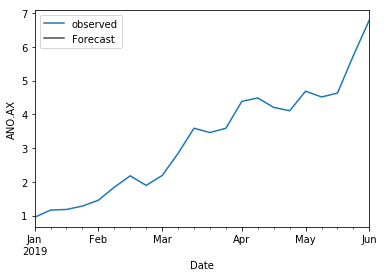

In [3]:
y=data.resample('W').mean()
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error


train_y, test_y = y[:-steps], y[-steps:]

p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
print(p1,p2,t)
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))


pred_ci=pd.DataFrame(index=forcast.index)
pred_ci['low'] = forcast-forcast*0.05
pred_ci['upper'] = forcast+forcast*0.05


#pred_ci.loc[y.index[-1]]=[y[-1],y[-1]]
#pred_ci=pred_ci.sort_index()
ax = y['2019-01-01':].plot(label='observed')
forcast.plot(ax=ax, label='Forecast',color='k', alpha=.7)

#ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel(ticker)
plt.legend()

plt.show()


Date
2017-02-05    0.295784
2017-02-12    0.295784
2017-02-19    0.271802
2017-02-26    0.257812
2017-03-05    0.257812
2017-03-12    0.279798
2017-03-19    0.273800
2017-03-26    0.265804
2017-04-02    0.262308
2017-04-09    0.275800
2017-04-16    0.272300
2017-04-23    0.269800
2017-04-30    0.277300
2017-05-07    0.265804
2017-05-14    0.259810
2017-05-21    0.263806
2017-05-28    0.259810
2017-06-04    0.259810
2017-06-11    0.259810
2017-06-18    0.244825
2017-06-25    0.257812
2017-07-02    0.239830
2017-07-09    0.269804
2017-07-16    0.289790
2017-07-23    0.313772
2017-07-30    0.323766
2017-08-06    0.311774
2017-08-13    0.303778
2017-08-20    0.293786
2017-08-27    0.305780
                ...   
2018-11-04    0.886360
2018-11-11    0.889356
2018-11-18    0.908342
2018-11-25    0.889356
2018-12-02    0.895354
2018-12-09    0.904344
2018-12-16    0.876872
2018-12-23    0.899000
2018-12-30    0.905000
2019-01-06    0.946250
2019-01-13    1.161000
2019-01-20    1.179000
2019-0

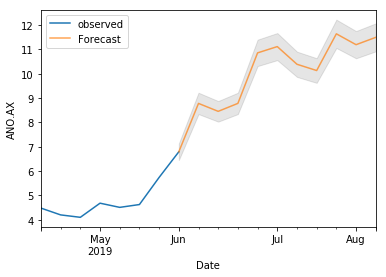

In [4]:
print(train_y)
print(test_y)
print(forcast) 
if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=10,disp=True,days=50)
else:
    print("wrong parameters",len(parameters))

In [5]:
result
sres=pd.DataFrame()
sres[ticker]=result
sres

,ANO.AX
2019-06-02,6.794000
2019-06-09,8.781814
2019-06-16,8.455700
2019-06-23,8.782986
2019-06-30,10.857098
2019-07-07,11.115550
2019-07-14,10.389546
2019-07-21,10.131960
2019-07-28,11.640247
2019-08-04,11.193476


In [6]:
sres=sres.transpose()
rate=sres[sres.columns[-1]]/sres[sres.columns[0]]
rate
dd=pd.DataFrame()
x=rate*500-500
dd['benefit']=x
dd['rate']=rate
dd[sres.columns[-0]]=sres[sres.columns[-3]]
dd[sres.columns[-2]]=sres[sres.columns[-2]]
dd[sres.columns[-1]]=sres[sres.columns[-1]]


dd.sort_values(by='benefit',ascending=False).head(300)


,benefit,rate,2019-06-02 00:00:00,2019-08-04 00:00:00,2019-08-11 00:00:00
ANO.AX,345.951331,1.691903,11.640247,11.193476,11.494787
